In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Preparation

In [2]:
from read_results import read_varnames
varnames = read_varnames("small_strato_f90/small_strato_Parameters.f90")[0:5]
print(len(varnames), varnames)

5 ['O1D', 'O', 'O3', 'NO', 'NO2']


In [3]:
df_init = pd.Series(data=1e-8, index=varnames)
df_init.values[:] = np.array([9.906E+01,
                              6.624E+08,
                              5.326E+11,
                              8.725E+08,
                              2.240E+08])

# Time series

In [4]:
import small_strato_f90.kpp4py as kpp4py

In [5]:
%time y_history = kpp4py.forward(df_init.values, 1000)
y_history.shape

CPU times: user 24.4 ms, sys: 530 µs, total: 24.9 ms
Wall time: 25.1 ms


(6, 1000)

In [6]:
df_history = pd.DataFrame(y_history.T, columns=varnames+['SUN'])
df_history.index.name = 'time'
df_history.head()

,O1D,O,O3,NO,NO2,SUN
time,,,,,,
0,99.653718,6.714964e+08,5.377002e+11,9.433271e+08,1.531729e+08,1.000000
1,100.584814,6.776955e+08,5.427275e+11,9.425322e+08,1.539678e+08,0.999997
2,101.498208,6.837862e+08,5.477060e+11,9.417444e+08,1.547556e+08,0.999951
3,102.370674,6.896392e+08,5.526329e+11,9.409458e+08,1.555542e+08,0.999753
4,103.162475,6.950326e+08,5.575015e+11,9.401065e+08,1.563935e+08,0.999220


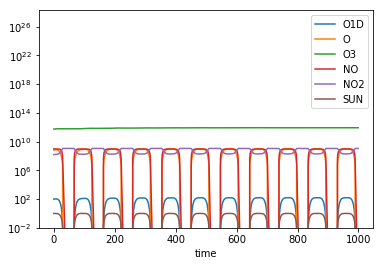

In [7]:
df_history.plot(y=None, ylim=[1e-2, None], logy=True)

In [8]:
from sklearn.preprocessing import StandardScaler

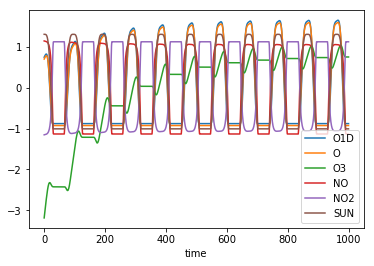

In [9]:
df_history_scaled = df_history.copy()
StandardScaler(copy=False).fit_transform(df_history_scaled.values);
df_history_scaled.plot()

# One time step, different initial condition

In [10]:
df_history.values.shape

(1000, 6)

In [11]:
y_rerun = kpp4py.onestep(df_history.values.T)
y_rerun.shape

(6, 1000)

In [12]:
df_rerun = pd.DataFrame(y_rerun.T, columns=varnames+['SUN'])
df_rerun.index.name = 'time'
df_rerun.head()

,O1D,O,O3,NO,NO2,SUN
time,,,,,,
0,100.585439,6.776990e+08,5.427275e+11,9.425327e+08,1.539673e+08,1.000000
1,101.507654,6.838388e+08,5.477069e+11,9.417518e+08,1.547482e+08,0.999997
2,102.411958,6.898690e+08,5.526369e+11,9.409779e+08,1.555221e+08,0.999951
3,103.274510,6.956562e+08,5.575122e+11,9.401931e+08,1.563069e+08,0.999753
4,104.054566,7.009725e+08,5.623226e+11,9.393680e+08,1.571320e+08,0.999220


In [13]:
df_history.head()

,O1D,O,O3,NO,NO2,SUN
time,,,,,,
0,99.653718,6.714964e+08,5.377002e+11,9.433271e+08,1.531729e+08,1.000000
1,100.584814,6.776955e+08,5.427275e+11,9.425322e+08,1.539678e+08,0.999997
2,101.498208,6.837862e+08,5.477060e+11,9.417444e+08,1.547556e+08,0.999951
3,102.370674,6.896392e+08,5.526329e+11,9.409458e+08,1.555542e+08,0.999753
4,103.162475,6.950326e+08,5.575015e+11,9.401065e+08,1.563935e+08,0.999220


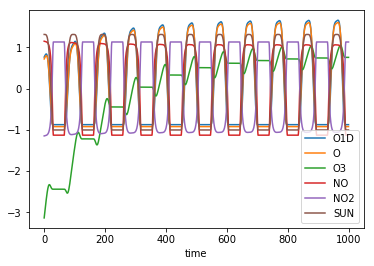

In [14]:
df_rerun_scaled = df_rerun.copy()
StandardScaler(copy=False).fit_transform(df_rerun_scaled.values);
df_rerun_scaled.plot()

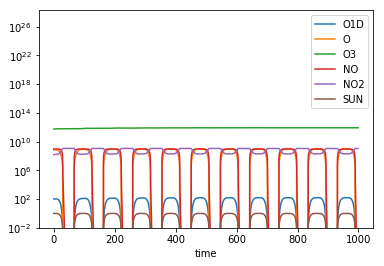

In [15]:
df_rerun.plot(y=None, ylim=[1e-2, None], logy=True)